# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Loes Bijman 15211312

Sacha Gijsbers 12798525

## Importing packages
Execute the following statement to import the packages `numpy` and `math` and the plotting package Matplotlib.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

The `math` package contains functions such as $\tan$, $\exp$ and the factorial $n \mapsto n!$

In [2]:
# example: the factorial function
math.factorial(5)

120

If you want to access `math.factorial` without typing `math.` each time you use it, use `import from`. Same for `math.exp`

In [3]:
from math import factorial, exp, tan

factorial(5)

120

## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


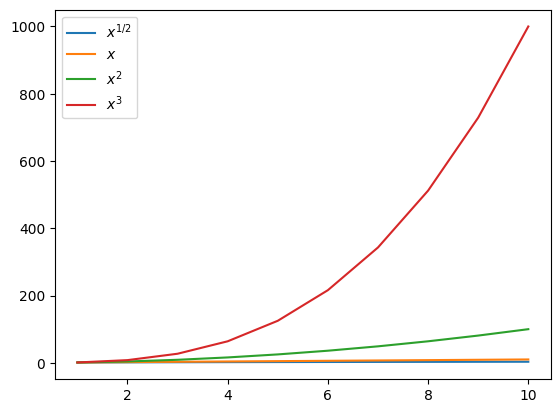

In [4]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

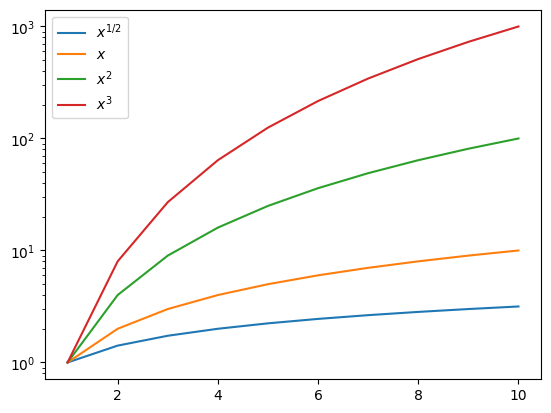

In [5]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


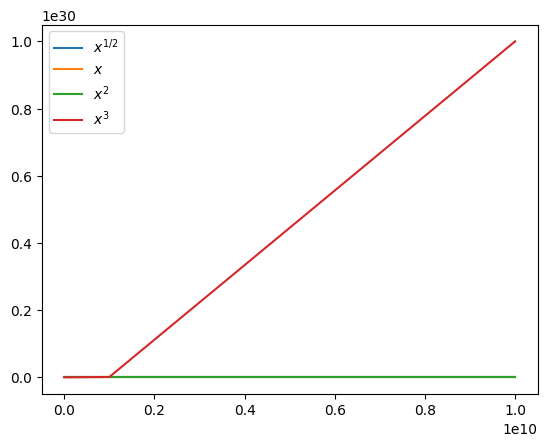

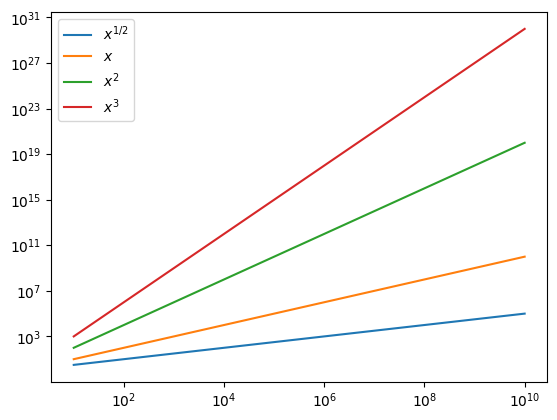

In [6]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Python float types
Information about the Python `float` type is in `sys.float_info`.

In [7]:
import sys

# printing float_info displays information about the python float type
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [8]:
# the individual properties can be accessed as follows
print("epsilon for the python float type: ", sys.float_info.epsilon)

epsilon for the python float type:  2.220446049250313e-16


-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

In [9]:
from math import tan, cos

def approx_derivative_tan(x, h):
    """
    Approximates the derivative of tan(x) using the finite difference formula.
    """
    return (tan(x + h) - tan(x))/h

def derivative_tan(x):
    """
    Determines the derivative of tan(x) analytically.
    """
    return 1/(cos(x)**2)

def abs_error(derivative_tan, approx_derivative_tan, x, h):
    """
    Calculates the absolute difference between the approximation and the analytical derivative.
    """
    return abs(derivative_tan(x) - approx_derivative_tan(x, h))

x = 1
h = 0.001

approx = approx_derivative_tan(x, h)
print(f"Approximate value for the derivative of tan(x) = {approx}")

analytic = derivative_tan(1)
print(f"Analytical value for the derivative of tan(x) = {analytic}")

error = abs_error(derivative_tan, approx_derivative_tan, x,h)
print(f"Absolute error for the derivative of tan(x) = {error}")


Approximate value for the derivative of tan(x) = 3.430863217312341
Analytical value for the derivative of tan(x) = 3.425518820814759
Absolute error for the derivative of tan(x) = 0.005344396497581894


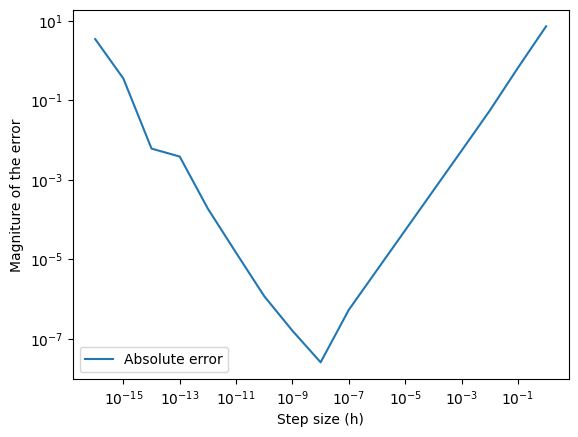

The minimum value for the magnitude of the error is 2.554135347665465e-08 for h = 1e-08


In [10]:
x = 1

h = []
for k in range(17):
    h.append(10**(-k))

y = []
for value in h:
    y.append(abs_error(derivative_tan,approx_derivative_tan, x, value))

plt.loglog(h, y, label=r"Absolute error")
plt.legend()
plt.ylabel("Magniture of the error")
plt.xlabel("Step size (h)")
plt.show()

# minimum value for the magnitude of the error
min_y = min(y)
min_index = y.index(min_y)
min_h = h[min_index]

print(f"The minimum value for the magnitude of the error is {min_y} for h = {min_h}")


The minimum value for the magnitude of the error we found is $2.554135347665465\cdot 10^{-8}$ for $h = 1\cdot 10^{-8}$. Since we use a set step size, it is not proven that this is the actual value of $h$ for which the error is minimal. We therefore approximate the value of $h$ with minimal error and state that $h_{\rm min}\approx 1\cdot10^{-8}$. Python uses double precision, which means that $\epsilon_{\rm mach} = 1 \cdot 10^{-16}$. We can see that $h_{\rm min}^2 \approx (1\cdot 10^{-8})^2 = 1\cdot 10^{-16} = \epsilon_{\rm mach}$. This corresponds to the rule of thumb as found in the Heath example 1.3.

## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

Approximate centered difference value for the derivative of tan(x) = 3.430863217312341
Analytical value for the derivative of tan(x) = 3.425518820814759
Absolute error for the derivative of tan(x) = 9.450528699606053e-06


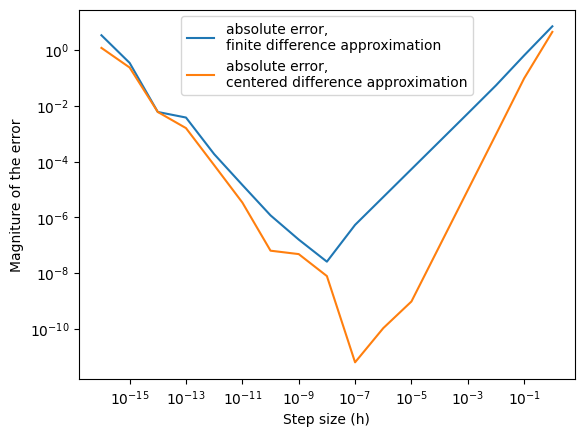

The minimum value for the magnitude of the error is 6.2239102760486276e-12 for h = 1e-07


In [11]:
def approx_difference_derivative_tan(x, h):
    """
    Approximates the derivative of tan(x) using the centered finite difference formula.
    """
    return (tan(x + h) - tan(x-h))/(2*h)

x = 1
h_value = 0.001

approx_difference = approx_derivative_tan(x, h_value)
print(f"Approximate centered difference value for the derivative of tan(x) = {approx_difference}")

analytic = derivative_tan(1)
print(f"Analytical value for the derivative of tan(x) = {analytic}")

error = abs_error(derivative_tan, approx_difference_derivative_tan, x,h_value)
print(f"Absolute error for the derivative of tan(x) = {error}")

# test for different values of h
h = []
for k in range(17):
    h.append(10**(-k))

y2 = []
for value in h:
    y2.append(abs_error(derivative_tan, approx_difference_derivative_tan, x, value))

plt.loglog(h, y, label=f"absolute error,\nfinite difference approximation")
plt.loglog(h, y2, label=f"absolute error,\ncentered difference approximation")
plt.legend()
plt.ylabel("Magniture of the error")
plt.xlabel("Step size (h)")
plt.show()

# minimum value for the magnitude of the error
min_y2 = min(y2)
min_index = y2.index(min_y2)
min_h2 = h[min_index]

print(f"The minimum value for the magnitude of the error is {min_y2} for h = {min_h2}")


The minimum value for the magnitude of the error is $6.2239102760486276\cdot 10^{-12}$ for $h = 1\cdot 10^{-7}$. The minimal magnitude of the error is greatly reduced (from $2.554135347665465\cdot10^{-8}$ with the finite difference approximation to $6.2239102760486276\cdot 10^{-12}$ with the centered difference approximation). The rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ does not apply for this approximation. We can see that the truncation error is reduced by the more accurate finite difference formula, meaning that the rounding error has an impact for larger values of $h$.

-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

Since $e^x$ is approximated with an infinite series, the truncation error becomes less and less the more terms are added to the sum. In a program where an approximation of $e^x$ is determined by summing the elements of the series, eventually the rounding error will make the approximation less accurate. When that is the case, we want to stop our program from adding terms to the approximation, as it is no longer improving the approximation.

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

In [12]:
from math import exp, factorial

def abs_error_exp(approx,x):
    """
    Calculates the absolute difference between the approximation of e^x and exp(x).
    """
    return (abs(approx - exp(x)))

def approximate_e(x, abs_error_exp):
    """
    Aprroximates e^x with the infinite series. Stops adding terms if the error of 
    the approximation starts to increase with the addition of another term.
    """
    prev_approx_e = 0
    approx_e = 0
    n = 0

    # initial error settings
    abs_err = exp(x) # the error does not get larger than this
    prev_abs = abs_err*2 # more than abs_err to enter while loop

    while abs_err < prev_abs:
        prev_approx_e = approx_e
        prev_abs = abs_err

        approx_e += (x**n)/factorial(n)
        abs_err = abs_error_exp(approx_e, x)
        
        n += 1
    return prev_approx_e, n - 1, prev_abs

x_list = [1, -1, 5, -5, 10, -10, 15, -15, 20, -20]
for x in x_list:
    approx_e, n, prev_abs = approximate_e(x, abs_error_exp)
    if n == 1:
        print(f"For x = {x}, we obtain e^{x} = {approx_e} with {n} terms. The function might not work.")
    else:
        print(f"For x = {x}, we obtain e^{x} = {approx_e} with {n} terms, with error = {prev_abs}")

For x = 1, we obtain e^1 = 2.7182818284590455 with 18 terms, with error = 4.440892098500626e-16
For x = -1, we obtain e^-1 = 0 with 0 terms, with error = 0.36787944117144233
For x = 5, we obtain e^5 = 148.41315910257657 with 33 terms, with error = 2.842170943040401e-14
For x = -5, we obtain e^-5 = 0 with 0 terms, with error = 0.006737946999085467
For x = 10, we obtain e^10 = 22026.46579480671 with 46 terms, with error = 7.275957614183426e-12
For x = -10, we obtain e^-10 = 0 with 0 terms, with error = 4.5399929762484854e-05
For x = 15, we obtain e^15 = 3269017.3724721107 with 58 terms, with error = 0.0
For x = -15, we obtain e^-15 = 0 with 0 terms, with error = 3.059023205018258e-07
For x = 20, we obtain e^20 = 485165195.40979016 with 68 terms, with error = 1.1920928955078125e-07
For x = -20, we obtain e^-20 = 0 with 0 terms, with error = 2.061153622438558e-09


The cases where the exponential function is not well approximated, is where $x < 0$. This can be seen by the number of terms added for the negative x values. For all $x<0$ the number of terms added is 1, after which the program quits, resulting in a large error. This can be explained by the fact that the series starts with $1+x$. After adding the $x<0$ values that we tested, the summation thus becomes smaller or equal to zero. This means that the absolute difference between the approximation and the value of $e^{x}$ becomes larger or equal to what it was before (when the error was $e^x - 1$). Therefore, the while loop is exited and no further terms are added.


## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

In [13]:
def approximate_e(x, abs_error_exp):
    """
    Aprroximates e^x with the infinite series. Stops adding terms if the error of 
    the approximation starts to increase with the addition of another term.
    Uses e^{-x} = 1/e^x for x-values below zero by taking the absolute value in 
    the series and testing the error for 1/(approximate_e^x)
    """
    approx_e = 0
    n = 0

    abs_err = exp(abs(x))
    prev_abs = abs_err*2

    while abs_err < prev_abs:
        prev_approx_e = approx_e
        prev_abs = abs_err

        approx_e += (abs(x)**n)/factorial(n)

        if x<0:
            abs_err = abs_error_exp(1/approx_e, x)
        else:
            abs_err = abs_error_exp(approx_e, x)
            
        n += 1
    
    if x<0:
        prev_approx_e = 1/prev_approx_e
    return prev_approx_e, n - 1, prev_abs

x_list = [1, -1, 5, -5, 10, -10, 15, -15, 20, -20]
for x in x_list:
    approx_e, n, prev_abs = approximate_e(x, abs_error_exp)
    print(f"For x = {x}, we obtain e^{x} = {approx_e} with {n} terms, with error = {prev_abs}")

For x = 1, we obtain e^1 = 2.7182818284590455 with 18 terms, with error = 4.440892098500626e-16
For x = -1, we obtain e^-1 = 0.3678794411714423 with 18 terms, with error = 5.551115123125783e-17
For x = 5, we obtain e^5 = 148.41315910257657 with 33 terms, with error = 2.842170943040401e-14
For x = -5, we obtain e^-5 = 0.006737946999085469 with 33 terms, with error = 1.734723475976807e-18
For x = 10, we obtain e^10 = 22026.46579480671 with 46 terms, with error = 7.275957614183426e-12
For x = -10, we obtain e^-10 = 4.539992976248486e-05 with 46 terms, with error = 6.776263578034403e-21
For x = 15, we obtain e^15 = 3269017.3724721107 with 58 terms, with error = 0.0
For x = -15, we obtain e^-15 = 3.059023205018258e-07 with 58 terms, with error = 0.0
For x = 20, we obtain e^20 = 485165195.40979016 with 68 terms, with error = 1.1920928955078125e-07
For x = -20, we obtain e^-20 = 2.0611536224385583e-09 with 68 terms, with error = 4.1359030627651384e-25


__Can you use the series in this form to obtain accurate results for $x<0$?__

By using the absolute value of $x$ in the series and testing the error for $\frac{1}{\rm approx \; e^x}$, the absolute error does not exceed $e^x$ after the addition of the first term. This means that the while-loop is not exited and the summation can continue, thereby making a more accurate approximation.

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

You cannot rearrange the series or regroup the terms of the series in any way to obtain more accurate results for $x<0$. One intuitive way to regroup the terms of the series would be to sort them as follows: 

$e^x \approx 1 + \frac{x^2}{2!} + \frac{x^4}{4!} + ... + x + \frac{x^3}{3!} + \frac{x^5}{5!} + ...$

In this way, the positive terms are added first and then the negative terms are subtracted. Therefore, the error does not increase after the addition of the second term. However, it is not known how many even terms are needed before the uneven terms can be subtracted. The cancellation of the algorithm is still arbitrary (as the user has to define how many even terms are added) and thus this approach is not an improvement to the non-grouped summation.

More generally, if the order of the elements in the series is changed, it becomes impossible to determine a cut-off point based on a predetermined criterion. The order in the series is lost, meaning that it is harder to determine when the criterion is met.